In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

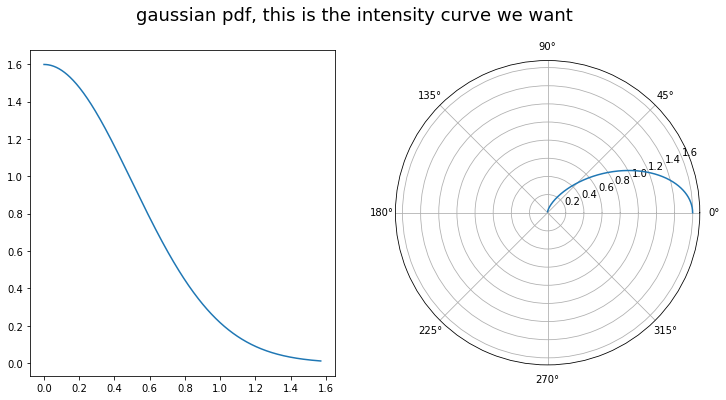

In [19]:

def generate_rand_from_pdf(size,  pdf_x, pdf_y):
    """Given a pdf, produce samples."""
    rng = np.random.default_rng()
    cdf = np.cumsum(pdf_y)
    cdf = cdf / cdf[-1]
    values = rng.random(size)
    value_bin = np.searchsorted(cdf, values, side='right')
    random_from_cdf = pdf_x[value_bin]
    return random_from_cdf

pdf_samples = np.linspace(0, np.pi/2, 512)
norm_pdf = scipy.stats.truncnorm.pdf(x=pdf_samples, a=0, b=np.pi, scale=0.5)

fig = plt.figure(figsize=[12,6])
plt.suptitle("gaussian pdf, this is the intensity curve we want", fontsize=18)
ax = plt.subplot(121)
plt.plot(pdf_samples, norm_pdf)
ax = plt.subplot(122, projection='polar')
plt.plot(pdf_samples, norm_pdf)
plt.show()

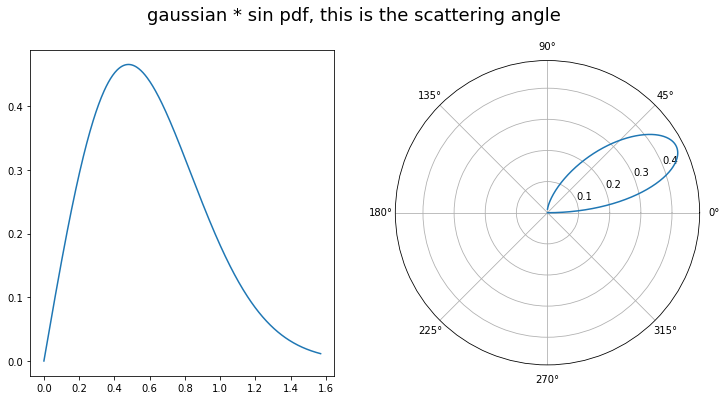

In [20]:
norm_sin_pdf = norm_pdf * np.sin(pdf_samples)

fig = plt.figure(figsize=[12,6])
plt.suptitle("gaussian * sin pdf, this is the scattering angle", fontsize=18)
ax = plt.subplot(121)
plt.plot(pdf_samples, norm_sin_pdf)
ax = plt.subplot(122, projection='polar')
plt.plot(pdf_samples, norm_sin_pdf)
plt.show()

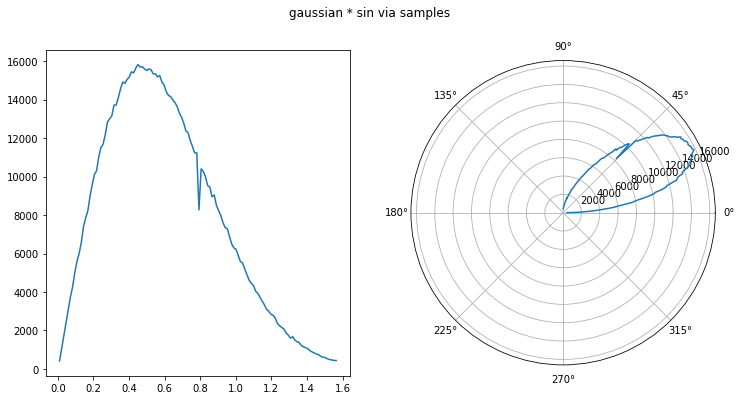

In [4]:
norm_sin_samples = generate_rand_from_pdf(1000000, pdf_samples, norm_sin_pdf)
h,b  = np.histogram(norm_sin_samples, 128)
bc = (b[:-1] + b[1:])/2

fig = plt.figure(figsize=[12,6])
plt.suptitle('gaussian * sin via samples, confirming above', fontsize=18)
ax = plt.subplot(121)
plt.plot(bc, h, snap=False)
ax = plt.subplot(122, projection='polar')
plt.plot(bc, h, snap=False)
plt.show()

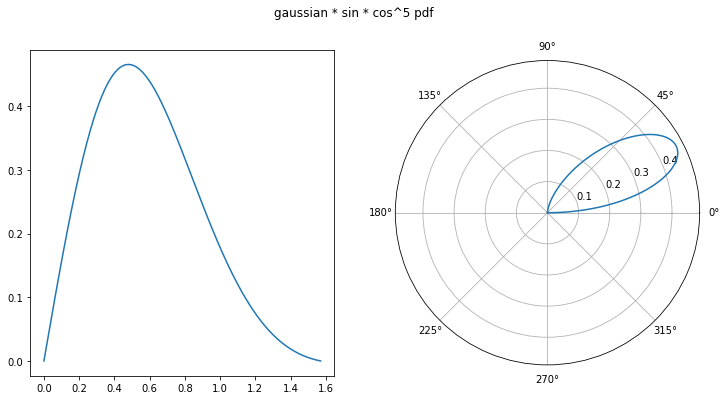

In [5]:
schlick = 1 - (1 - np.cos(pdf_samples)) ** 5 # really zero at 90deg
norm_sin_schlick_pdf = norm_pdf * np.sin(pdf_samples) * schlick

fig = plt.figure(figsize=[12,6])
plt.suptitle("gaussian * sin * cos^5 pdf ", fontsize=18)
ax = plt.subplot(121)
plt.plot(pdf_samples, norm_sin_schlick_pdf)
ax = plt.subplot(122, projection='polar')
plt.plot(pdf_samples, norm_sin_schlick_pdf)
plt.show()

[0.54101791 0.50413033 0.27358292 ... 0.64245877 0.59942326 0.80537894]


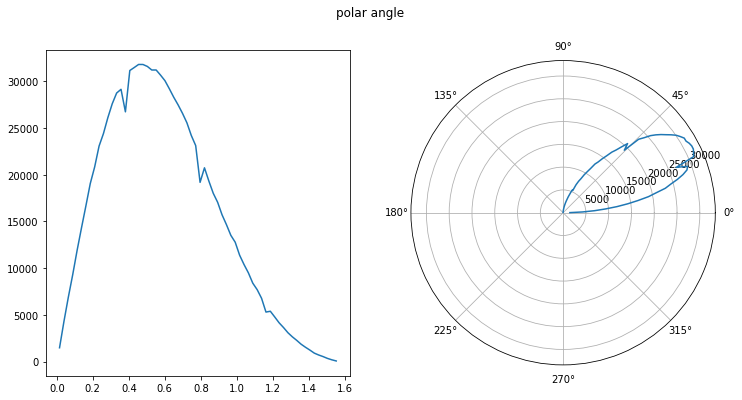

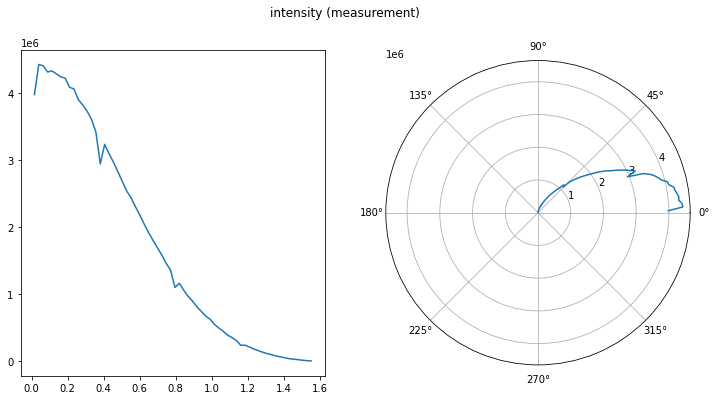

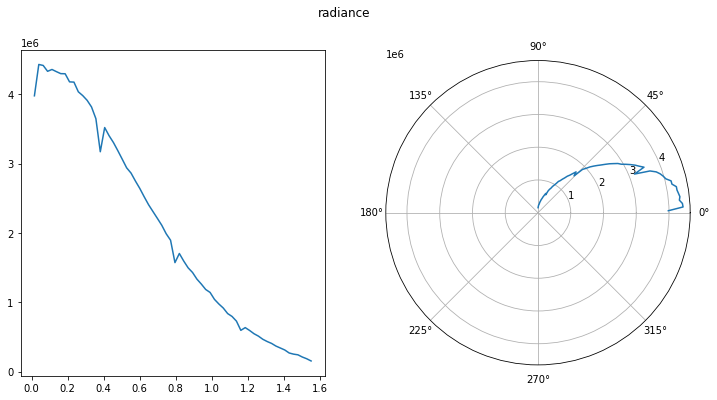

In [15]:
size = 1000000 # 1e6
rng = np.random.default_rng()
#theta = np.arccos(rng.uniform(-1,1,size)) # isotropic
#theta = np.arccos(rng.uniform(-1,1,size))/2 # lambertian
theta = generate_rand_from_pdf(size, pdf_samples, norm_sin_schlick_pdf) # yields gaussian intensity

print(theta)

h,b  = np.histogram(theta, 64)
bc = (b[:-1] + b[1:])/2

fig = plt.figure(figsize=[12,6])
plt.suptitle('polar angle')
ax = plt.subplot(121)
plt.plot(bc, h)
ax = plt.subplot(122, projection='polar')
plt.plot(bc, h)
plt.show()

# divide by bin width to get intensity
bb = np.cos(b[:-1]) - np.cos(b[1:])

fig = plt.figure(figsize=[12,6])
plt.suptitle('intensity (measurement)')
ax = plt.subplot(121)
plt.plot(bc, h/bb)
ax = plt.subplot(122, projection='polar')
plt.plot(bc, h/bb)
plt.show()

# divide by area to get radiance
a = np.cos(bc)

fig = plt.figure(figsize=[12,6])
plt.suptitle('radiance')
ax = plt.subplot(121)
plt.plot(bc, h/(bb*a))
ax = plt.subplot(122, projection='polar')
plt.plot(bc, h/(bb*a))
plt.show()